# Radio CR Air Shower Detection

- GZK effect means that extremely high energy CR are slowed down by the CMB
    - so there could be far away CR sources of higher energy that we typically see but they are slowed down
- highest energy detection of particles
    - neutrinos: ~ $10^{16}$ eV
    - photons: ~ $10^{15}$ eV
    - CR: ~ $10^{20}$ eV

- extensive air shower
    - geomagnetic emission
        - requires longer distances
        - 90% of emission is geomagnetic in the atmosphere
            - less dominant in ice or other dense media
    - Askaryan emission
        - requires shorter distances
        - 10% of emission is Askaryan in the atmosphere
            - more dominant in ice or other dense media
    - radio is only effective when the shower is significantly offset from the geomagnetic field, $B_{geo}$
        - this means that the local strength of the geomagnetic field effects the effectiveness of radio detection
    - heavier particles/nuclei usually interact higher in the atmosphere
        - leads to a larger shower cone footprint on the ground
        - for distant showers, a dip will be seen in the radio signal
            - enhancement along the chernekov angle (~1 deg in air)
    - the footprint size is also effected by the frequency you are observing at
        - higher frequencies have a smaller footprint
            - attenuation is negligible in the relevant frequency range
            - more an issue of wavelength size vs size of the shower
            - higher frequencies lose coherence in the shower when you get off the chernekov angle
        - the issue is that noise background is also high at lower frequencies
        - at some point higher frequencies also have a higher noise background
        - have to find the sweet spot
- cherenkov angle
    - the angle where the particle's emission is coherent with the shower's
        - the particle is moving faster than the speed of light in the medium
        - the shower magnetic field is moving at the speed of light in the medium

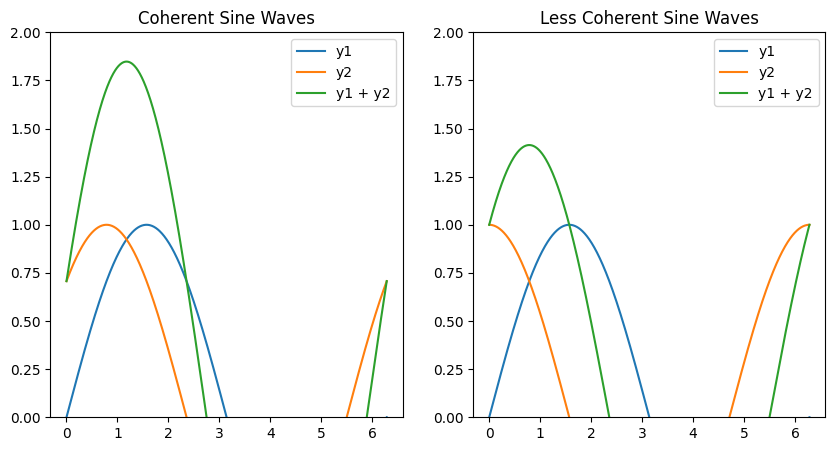

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# make a subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# make a coherent sine wave
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.sin(x + np.pi/4)
y = y1 + y2
ax[0].plot(x, y1)
ax[0].plot(x, y2)
ax[0].plot(x, y)
ax[0].set_title('Coherent Sine Waves')
ax[0].set_ylim([0, 2])

ax[0].legend(['y1', 'y2', 'y1 + y2'])

# make a less coherent sine wave
y1 = np.sin(x)
y2 = np.sin(x + np.pi/2)
y = y1 + y2
ax[1].plot(x, y1)
ax[1].plot(x, y2)
ax[1].plot(x, y)
ax[1].set_title('Less Coherent Sine Waves')
ax[1].legend(['y1', 'y2', 'y1 + y2'])
ax[1].set_ylim([0, 2])

plt.show()

- data analysis
    - FFT to turn waveform into the frequency-amplitude domain
    - narrow & discrete sources are likely manmade
        - filter these out
    - neural networks are spooky good at pulling signals out of noise
        - **Applicability to noisy sound recording data?**
- reconstruction
    - direction
        - arrival time method
            - fit wavefront model to the data
            - hyperbolic shape of the wavefront
                - legs $\approx$ 1-2° from horizontal
                - possible E-W asymmetry not yet confirmed
        - beamforming method
            - shift signals in time to align them
            - same as SONAR beamforming
            - direction precision < 0.5°
            - **lowers the detection threshold**
                - since signals are combined, noise is reduced relative to actual signals
    - energy
        - by the amplitude of the signal
    - mass of particle
        - mass $\rightarrow$ type of particle
        - statistical only
        - atmospheric depth of radio emission
            - heavier nuclei interact higher in the atmosphere
            - they also create more muons at ground level
            - 
    - reconstruction by simulation (sometimes called "templating")
        - simulate the shower angle and energy with different nuclei
            - CoREAS is used frequently
            - decide which nucleus is most likely based on the simulation
        - this may be replaced by ML techniques in the future

- current experiments
    - Pierre Auger Observatory
        - largest cosmic ray observatory in the world
            - 3000 km$^2$ detector area
            - full size since 2008
        - combination of surface detectors and fluorescence telescopes
        - AERA radio detector 
            - part of the Auger Observatory
            - 153 autonomous radio stations
            - 17 km$^2$ area
            - accuracy is competetive with optical methods
            - unlike optical, radio is effective 24/7 and in all weather
        - mass separation via radio + muon detectors
            - mo' data, mo' better mass sensitivity
        - because more horizontal showers have a wider smear, less antenna density is needed
            - vertical showers would require many more antennas spaced closer together
        - AugerPrime
            - an upgrade for PAO
            - scintillators
            - radio antennas
            - underground muon detectors
    - IceCube Gen2 Surface Array
        - different from Gen2 Radio which is in ice
        - upgrade plan is to add antennas and scintillators
            - stations with 3 antennas, 4 scintillators
            - stations set up on poles
                - when the snow gets deep, add a pole extension

- reconstruction continued
    - a star shaped (asterisk shaped) pattern is used in CoREAS for interpolation
    - this leads to a deformed star shape on the ground due to the axis of the shower
    - process
        1. time shift by phase gradient corresponding to plane wave approximation
        2. bilinear interpolation of amplitude per frequency bin
        3. bilinear interpolation of unit vector of phase for each frequency bin
- **interupted by sandhill crane out the window**
    - back to physics
    - Gen2 should be sensitive to much lower zenith angles (more vertical)
    - would make IceCube the most sensitive cosmic ray detector in the world at the highest energies